In [1]:
# EDA

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# data 
file_location = "/Users/mingchang/Downloads/"
file_name = "Python_project_eda.csv"
my_data = pd.read_csv(file_location + file_name)

In [3]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [4]:
my_data.shape

(566699, 15)

In [5]:
# summary statistics
my_data.describe()

/Users/mingchang/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
50%,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
75%,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# mean: center metric
def mean(x):
    return float(sum(x)) / len(x)

np.mean(my_data.spend_usd_next_14_days)

67.80883817484795

In [7]:
# variance: how data spreads out
def stddev(x):
    m = mean(x)
    return math.pow(sum((i - m)**2 for i in X) / len(X), 0.5) # list comprehension

np.std(my_data.spend_usd_next_14_days)

214.09668268368236

In [9]:
# quantiles
# median
# question: when to use mean, when to use median?
def median(x):
    s = sorted(x)
    n = len(x)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (s[lower_mid], s[upper_mid])

#np.median(my_data.total_spend)
a= np.nanmedian(my_data.spend_usd_next_14_days)
print a 
# quantile
def quantile_range(q, x):
    s = sorted(x)
    n = len(x)
    upper_d = int(math.ceil(q * (n + 1)))
    lower_d = int(math.floor(q * (n + 1)))
    # edge cases
    if upper_d == 0: upper_d = 1
    if upper_d == n+1: upper_d = n
    if lower_d == 0: lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1], S[upper_d-1])

#np.percentile(my_data.total_spend, [0, 25, 50, 75, 99, 100])
b = np.nanpercentile(my_data.spend_usd_next_14_days, [0, 25, 50, 75, 99, 100])
print b

15.828656
[  2.99100000e-03   4.99000000e+00   1.58286560e+01   5.47956018e+01
   7.75693500e+02   2.25195700e+04]


In [12]:
# for convinience, remove nan value
spend_usd_next_14_days = my_data.spend_usd_next_14_days
spend_usd_next_14_days = spend_usd_next_14_days.dropna()
#total_spend.fillna(0.0)
spend_usd_next_14_days.describe()

count    89032.000000
mean        67.808838
std        214.097885
min          0.002991
25%          4.990000
50%         15.828656
75%         54.795602
max      22519.570000
Name: spend_usd_next_14_days, dtype: float64

In [13]:
# skewness
stats.skew(spend_usd_next_14_days) # skewness>0 -> right skewed -> mean > median

25.481428896161574

(array([  4.,  16.,  21.,  26.,  18.,   5.,   3.,   2.,   3.,   2.]),
 array([  41.37640905,   48.79943885,   56.22246865,   63.64549845,
          71.06852825,   78.49155805,   85.91458785,   93.33761765,
         100.76064745,  108.18367725,  115.60670706]),
 <a list of 10 Patch objects>)

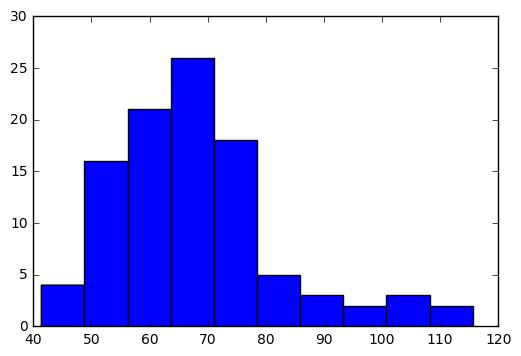

In [14]:
# CLT: our data -> normal
def get_sample(data, n):
    return np.random.choice(data, n, replace=False)

def sample_mean(x):
    return np.mean(x) / n

samples = []

N = 200
for i in range(100):
    this_sample = get_sample(spend_usd_next_14_days, N)
    samples.append(np.mean(this_sample))

plt.hist(samples)

In [2]:
# variable transformation
# binary -> categorical
# wide <-> long

In [4]:
# missing value
# replace with some value: df.fillna()
# interpolation: df.interpolate(method='spline')

In [95]:
d1 = np.array([1,2,3,4,np.nan,6])
d2 = np.array([2,4,6,8,np.nan,12])

df = pd.DataFrame(
    {
        "d1": d1,
        "d2": d2
    },
    columns = ["d1","d2"]
)
df

,d1,d2
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,NaN,NaN
5,6.0,12.0


In [15]:
# exclude records: df.dropna(axis=0)
df.dropna(axis=0)

,d1,d2
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
5,6.0,12.0


In [20]:
# fill with value
df
df.fillna(5)

,d1,d2
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,5.0,5.0
5,6.0,12.0


In [96]:
# interpolation: df.interpolate(method='spline')
d3 = pd.DataFrame([1,2,3,4,np.nan,6])
d3
d3.interpolate()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0


In [ ]:
# our data:
# need to analzye each situation and make assumptions.
# example:
# spend: nan means there's no value in the orders table. so replace with 0 makes sense
# country: nan means country is missing. better leave it as nan

In [5]:
# outlier detection?
# depends on business use case
# show the impact of outlier on mean and standard deviation

In [ ]:
# dealing with outliers:
# better solution: winsorization
#https://en.wikipedia.org/wiki/Winsorizing

In [15]:
# own way
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s

my_series = pd.Series(spend_usd_next_14_days)

result = winsorize_series(my_series)
result.describe()

count    89032.000000
mean        49.806191
std         76.009381
min          1.026880
25%          4.990000
50%         15.828656
75%         54.795602
max        289.344500
Name: spend_usd_next_14_days, dtype: float64

In [ ]:
# existing function in scipy
stats.mstats.winsorize()